In [1]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.utils import np_utils
import cv2

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# shorten the dataset size
X_train = X_train[0:10000,:,:,:]
y_train = y_train[0:10000,:]
X_test = X_test[0:2000,:,:,:]
y_test = y_test[0:2000,:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)
(2000, 32, 32, 3)
(2000, 1)


In [5]:
# # some experiments on types and np_utils
# print(y_train.shape)
# print(type(y_train))
# print(y_train[0:10])

# arr = numpy.array([2,3,1,0,6])
# t_var = np_utils.to_categorical(arr)
# print(t_var)
# print(type(t_var))
# print(t_var.shape)

In [6]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]    # get number of classes

In [8]:
# Create the model
model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', kernel_constraint=maxnorm(3)))
model.add(BatchNormalization())    # using batch_norm, without activation, it works best on linear inputs
model.add(Activation('relu'))      # apply batch_norm before non-linearity
model.add(Dropout(0.2))
model.add(Conv2D(48, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())    # using batch_norm, without activation, it works best on linear inputs
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 15
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        27712     
__________

In [9]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 10000 samples, validate on 2000 samples
Epoch 1/15
10000/10000 [==============================] - 10s 1ms/step - loss: 2.0976 - acc: 0.2749 - val_loss: 1.7032 - val_acc: 0.3875
Epoch 2/15
10000/10000 [==============================] - 9s 924us/step - loss: 1.6754 - acc: 0.3982 - val_loss: 1.5649 - val_acc: 0.4505
Epoch 3/15
10000/10000 [==============================] - 9s 921us/step - loss: 1.5317 - acc: 0.4435 - val_loss: 1.4457 - val_acc: 0.4835
Epoch 4/15
10000/10000 [==============================] - 9s 918us/step - loss: 1.4145 - acc: 0.4891 - val_loss: 1.5529 - val_acc: 0.4505
Epoch 5/15
10000/10000 [==============================] - 9s 916us/step - loss: 1.3166 - acc: 0.5240 - val_loss: 1.4052 - val_acc: 0.5150
Epoch 6/15
10000/10000 [==============================] - 9s 906us/step - loss: 1.2253 - acc: 0.5643 - val_loss: 1.3779 - val_acc: 0.5055
Epoch 7/15
10000/10000 [==============================] - 9s 905us/step - loss: 1.1253 - acc: 0.5934 - val_loss: 1.2535 - va

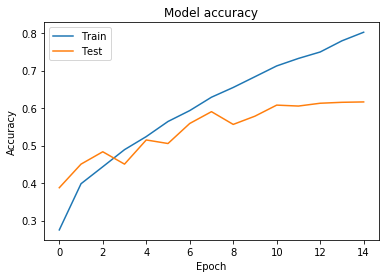

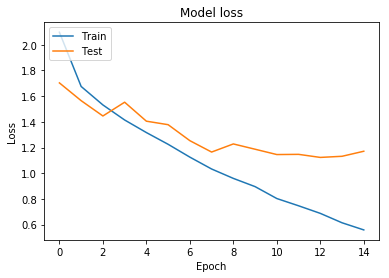

In [11]:
# visualize the training progress     # keep verbose=1 in model.fit()

%matplotlib inline
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

'window_36b6da5786bc8e'

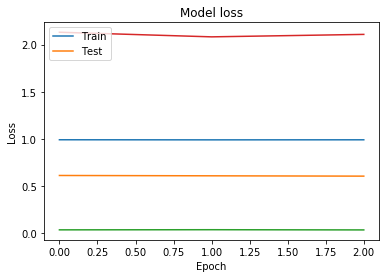

Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.


In [34]:
# show visualization with visdom     # first start visdom from terminal
import visdom
vis = visdom.Visdom()
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

vis.matplot(plt)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

vis.matplot(plt)